# Размножение изображений
Применим дополнение (augmentation) для изображений и проверим, как увеличение числа исходных объектов влияет на точность работы нейросети.

Используем архитектуру LeNet.
![Дополнение данных](augmentation.jpg)

### Подключение библиотек

In [1]:
import numpy as np
import keras as K
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Загрузка набора MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = K.datasets.mnist.load_data()
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
y_train = K.utils.to_categorical(y_train, 10)
y_test = K.utils.to_categorical(y_test, 10)

### Размножение изображений
Незначительные смещения и повороты (не отражения, не на 90/180 градусов, 9!=6), нормализация, масштабирование.

Создаем генератор искаженных изображения.

In [3]:
images = K.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    brightness_range=(0.5,2.0)
)
images.fit(X_train)

0


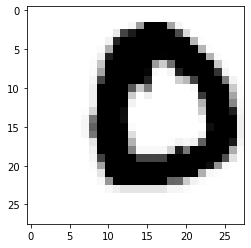

In [5]:
img = images.flow(X_train, y_train, batch_size=1)[0]
print (np.argmax(img[1]))
plt.imshow(np.reshape(img[0], (len(img[0][0]), len(img[0][0][0]))), cmap="Greys")
plt.show()

### LeNet: модель нейронной сети
Свертка 6@5x5 -> Подвыборка 2x2 -> Свертка 16@5x5 -> Повыборка 2x2 -> Полносвязный слой 120 -> Полносвязный слой 84 -> Выходной слой 10

In [6]:
model = K.Sequential()
model.add(K.layers.Conv2D(filters=6, kernel_size=(5,5), activation="relu", input_shape=(28, 28, 1)))
model.add(K.layers.AveragePooling2D())
model.add(K.layers.Conv2D(filters=16, kernel_size=(5,5), activation="relu"))
model.add(K.layers.AveragePooling2D())
model.add(K.layers.Flatten())
model.add(K.layers.Dense(units=120, activation="relu"))
model.add(K.layers.Dense(units=84, activation="relu"))
model.add(K.layers.Dense(units=10, activation="softmax"))
model.compile(optimizer="SGD", loss=K.losses.categorical_crossentropy)

### Обучение нейросети
Сначала обучим модель на исходных изображениях

In [7]:
model.fit(X_train, y_train, batch_size=10000, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 7s 122us/step - loss: 8.9393
Epoch 2/100
60000/60000 [==============================] - 7s 120us/step - loss: 2.2934
Epoch 3/100
60000/60000 [==============================] - 7s 118us/step - loss: 2.2803
Epoch 4/100
60000/60000 [==============================] - 7s 119us/step - loss: 2.2670
Epoch 5/100
60000/60000 [==============================] - 7s 118us/step - loss: 2.2536
Epoch 6/100
60000/60000 [==============================] - 7s 118us/step - loss: 2.2398
Epoch 7/100
60000/60000 [==============================] - 7s 119us/step - loss: 2.2235
Epoch 8/100
60000/60000 [==============================] - 7s 113us/step - loss: 2.2031
Epoch 9/100
60000/60000 [==============================] - 7s 112us/step - loss: 2.1774
Epoch 10/100
60000/60000 [==============================] - 7s 113us/step - loss: 2.1449
Epoch 11/100
60000/60000 [==============================] - 8s 126us/step - loss: 2.1043
Epoch 12/100
60000/60000 [====

60000/60000 [==============================] - 6s 101us/step - loss: 0.1560
Epoch 94/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1558
Epoch 95/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1541
Epoch 96/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1519
Epoch 97/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1511
Epoch 98/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1501
Epoch 99/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1497
Epoch 100/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1472


В качестве дополнительного набора данных используем генератор искаженных изображений, увеличиваем объем данных в 2 раза

In [8]:
model.fit(images.flow(X_train, y_train, batch_size=int(len(X_train)/10)), steps_per_epoch=10, epochs=100)

Epoch 1/100
10/10 [==============================] - 26s 3s/step - loss: 1.0308
Epoch 2/100
10/10 [==============================] - 25s 3s/step - loss: 0.8538
Epoch 3/100
10/10 [==============================] - 25s 3s/step - loss: 0.8072
Epoch 4/100
10/10 [==============================] - 25s 3s/step - loss: 0.7131
Epoch 5/100
10/10 [==============================] - 27s 3s/step - loss: 0.7156
Epoch 6/100
10/10 [==============================] - 26s 3s/step - loss: 0.6353
Epoch 7/100
10/10 [==============================] - 26s 3s/step - loss: 0.5860
Epoch 8/100
10/10 [==============================] - 26s 3s/step - loss: 0.5985
Epoch 9/100
10/10 [==============================] - 25s 3s/step - loss: 0.5867
Epoch 10/100
10/10 [==============================] - 25s 3s/step - loss: 0.5287
Epoch 11/100
10/10 [==============================] - 25s 3s/step - loss: 0.5553
Epoch 12/100
10/10 [==============================] - 25s 3s/step - loss: 0.5108
Epoch 13/100
10/10 [=================

### Предсказание значений и оценка

In [9]:
r = model.predict(X_test)
print (classification_report(np.argmax(r, axis=1), np.argmax(y_test, axis=1), digits=4))

              precision    recall  f1-score   support

           0     0.9827    0.9857    0.9842       977
           1     0.9877    0.9903    0.9890      1132
           2     0.9641    0.9822    0.9731      1013
           3     0.9782    0.9482    0.9630      1042
           4     0.9664    0.9703    0.9684       978
           5     0.9552    0.9726    0.9638       876
           6     0.9749    0.9842    0.9795       949
           7     0.9689    0.9784    0.9736      1018
           8     0.9784    0.9607    0.9695       992
           9     0.9594    0.9462    0.9528      1023

    accuracy                         0.9719     10000
   macro avg     0.9716    0.9719    0.9717     10000
weighted avg     0.9720    0.9719    0.9719     10000

